Problem #5 (65 points)
For this problem, you need to use the built-in sklearn digits dataset. You can load this data using

        from sklearn.datasets import load_digits
  digits = load_digits()

(data will be stored in digits.data and desired output will be stored in digits.target)

Divide the data into training and test sets using train_test_split and random_state=0

1.	Train a Gradient Boosted Regression Trees classifier and optimize its performance on this data. Using 4-fold cross validation, design your experiment to learn the best values for the following parameters using 4-fold cross validation: n_estimators, learning_rates, and max_depth 
a.	Analyze the results of the classifier using its optimal parameters and comment on its generalization capability by comparing the accuracy on the training, validation, and test data.
b.	Identify the number of misclassified test samples from each class. Explain why some classes are easier to classifier than others.
c.	Visualize and explain the relevant features identified by the classifier
Create a white 8x8 image that represents the original 64 features. Map each identified relevant feature to this 2D image and display it using a color or a grey scale that reflects its importance (as illustrated in the lecture)

2.	Train a Support Vector Machines classifier and optimize its performance on this data. 
Using 4-fold cross validation, design your experiment to learn the best values for the following parameters 
i.	Data normalization: no preprocessing vs. StandardScaler
ii.	Kernel: Linear vs. RBF
iii.	The regularization parameter C: 4 different values. 
a.	 Analyze the results of the classifier using its optimal parameters and comment on its generalization capability by comparing the accuracy on the training, validation, and test data.
b.	Identify the number of misclassified test samples from each class.

3.	Analyze the correlation between the output of the 2 classifiers by displaying the predict_proba of SVM vs. predict_proba of GBRT (using test data). Using these scatter plots (only for classes “0”, “3”, and “7”), identify (if available) the following 3 groups
c.	G-1: Samples that are easy to classify correctly by the SVM, but hard to classify by GBRT
d.	G-2: Samples that are easy to classify correctly by the GBRT, but hard to classify by SVM
e.	G-3: Samples that are hard to classify correctly by both methods
For each group, display few samples (as images) and identify any common features among them.



In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns

In [92]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [93]:
digits = load_digits()

In [94]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

80 percent of data used for train and 20 percent of data used for test

In [95]:
n_estimators = [10, 50, 100]
learning_rates = [0.01, 0.1, 0.2]
max_depths = [1, 3, 5]


kf = KFold(n_splits=4, shuffle=True, random_state=0)


results = []


for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        for max_depth in max_depths:
            
            gbrt = GradientBoostingClassifier(
                n_estimators=n_estimator, 
                learning_rate=learning_rate, 
                max_depth=max_depth,
                random_state=0
            )

         
            start_time = time.time()


            cv_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, n_jobs=-1)

        
            gbrt.fit(X_train, y_train)

           
            train_accuracy = accuracy_score(y_train, gbrt.predict(X_train))

            
            elapsed_time = time.time() - start_time

          
            results.append({
                'n_estimators': n_estimator,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'avg_training_accuracy': train_accuracy,
                'avg_cv_accuracy': np.mean(cv_scores),
                'time_taken': elapsed_time
            })

results_df = pd.DataFrame(results)
print(results_df)

    n_estimators  learning_rate  max_depth  avg_training_accuracy  \
0             10           0.01          1               0.558278   
1             10           0.01          3               0.881218   
2             10           0.01          5               0.976986   
3             10           0.10          1               0.766889   
4             10           0.10          3               0.961396   
5             10           0.10          5               0.997773   
6             10           0.20          1               0.861173   
7             10           0.20          3               0.988864   
8             10           0.20          5               1.000000   
9             50           0.01          1               0.708983   
10            50           0.01          3               0.934670   
11            50           0.01          5               0.991091   
12            50           0.10          1               0.943578   
13            50           0.10   

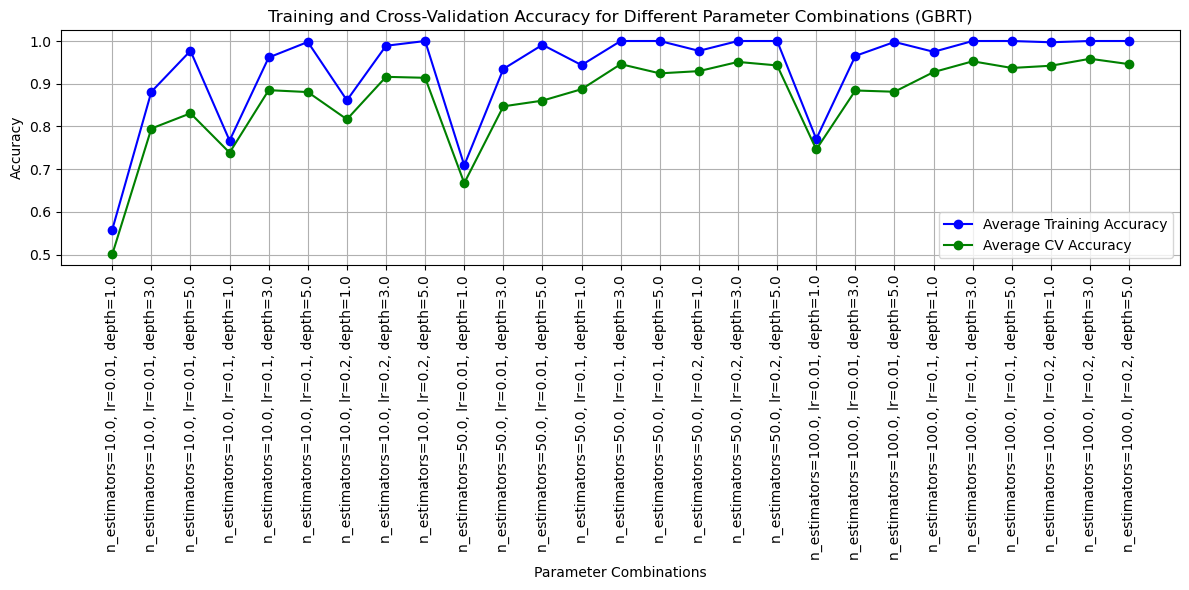

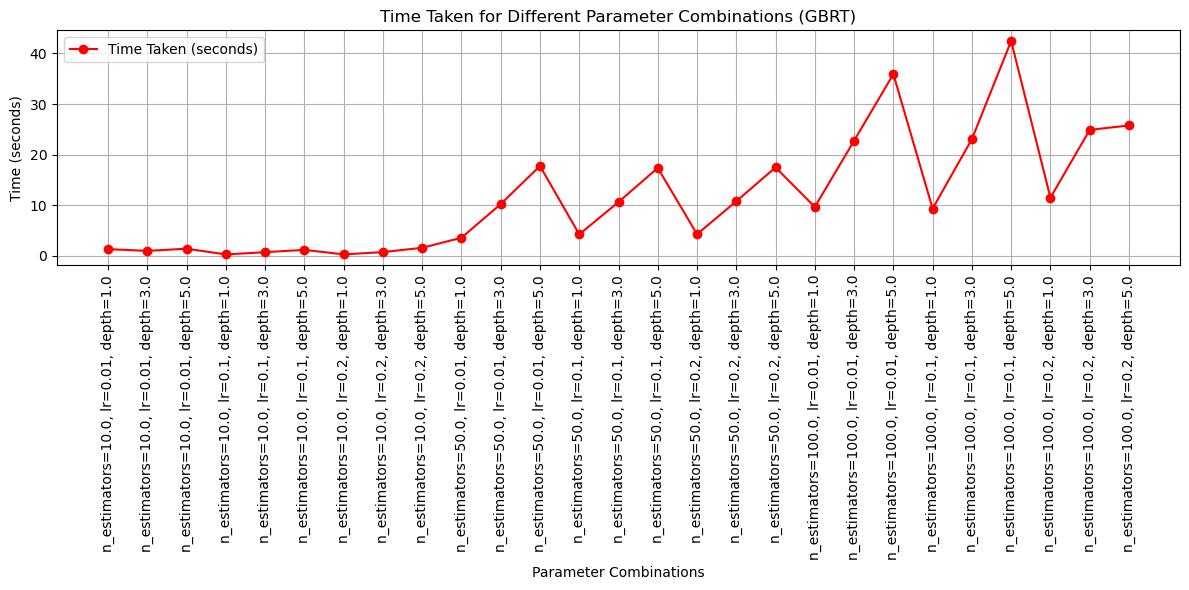

In [96]:
plt.figure(figsize=(12, 6))


labels = [
    f"n_estimators={row['n_estimators']}, lr={row['learning_rate']}, depth={row['max_depth']}" 
    for _, row in results_df.iterrows()
]


plt.plot(labels, results_df['avg_training_accuracy'], label='Average Training Accuracy', marker='o', linestyle='-', color='b')


plt.plot(labels, results_df['avg_cv_accuracy'], label='Average CV Accuracy', marker='o', linestyle='-', color='g')

plt.xticks(rotation=90)  
plt.xlabel('Parameter Combinations')
plt.ylabel('Accuracy')
plt.title('Training and Cross-Validation Accuracy for Different Parameter Combinations (GBRT)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))

plt.plot(labels, results_df['time_taken'], label='Time Taken (seconds)', marker='o', linestyle='-', color='r')

plt.xticks(rotation=90) 
plt.xlabel('Parameter Combinations')
plt.ylabel('Time (seconds)')
plt.title('Time Taken for Different Parameter Combinations (GBRT)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [97]:
n_estimators = 50
learning_rate = 0.1
max_depth = 1


gbrt = GradientBoostingClassifier(
    n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=0
)

gbrt.fit(X_train, y_train)


train_accuracy = accuracy_score(y_train, gbrt.predict(X_train))
test_accuracy = accuracy_score(y_test, gbrt.predict(X_test))

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9435783221974758
Test Accuracy: 0.8844444444444445


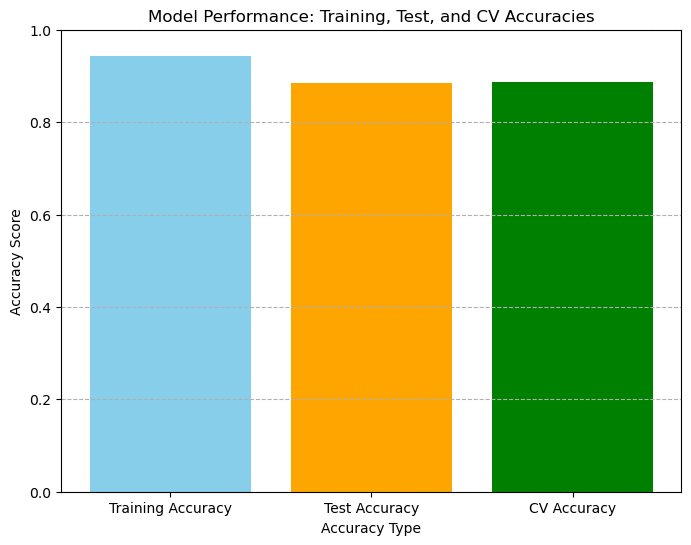

In [98]:
training_accuracy = train_accuracy 
test_accuracy = test_accuracy       
cv_accuracy = 0.887176

labels = ['Training Accuracy', 'Test Accuracy', 'CV Accuracy']
values = [training_accuracy, test_accuracy, cv_accuracy]


plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['skyblue', 'orange', 'green'])
plt.ylim(0, 1)
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Score')
plt.title('Model Performance: Training, Test, and CV Accuracies')
plt.grid(axis='y', linestyle='--')


plt.show()

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
y_pred = gbrt.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
misclassified = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)


for i, num_misclassified in enumerate(misclassified):
    print(f"Class {i}: {num_misclassified} misclassified samples")

Class 0: 0 misclassified samples
Class 1: 8 misclassified samples
Class 2: 9 misclassified samples
Class 3: 6 misclassified samples
Class 4: 5 misclassified samples
Class 5: 5 misclassified samples
Class 6: 1 misclassified samples
Class 7: 5 misclassified samples
Class 8: 7 misclassified samples
Class 9: 6 misclassified samples


<Figure size 1200x600 with 0 Axes>

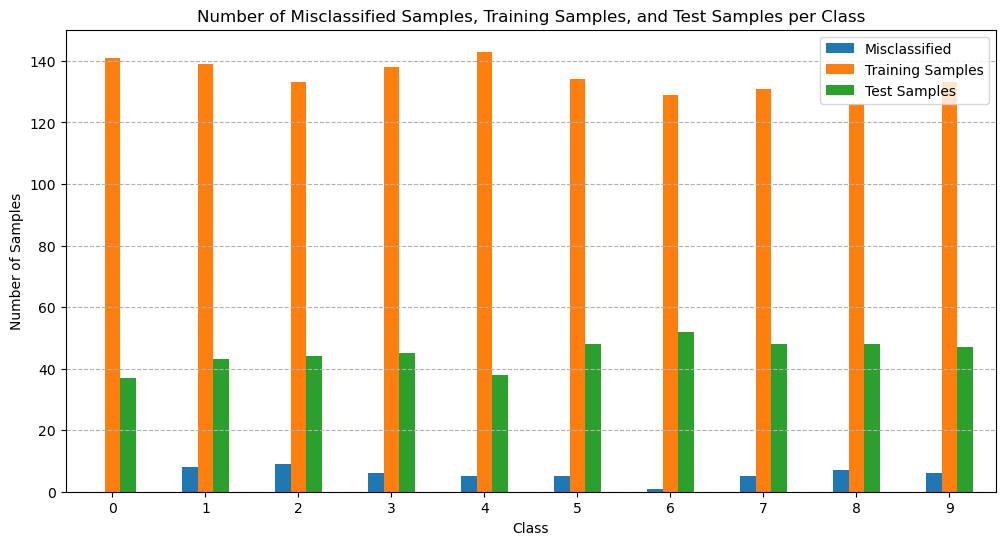

In [101]:
misclassified = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)
classes = np.arange(len(misclassified))
df = pd.DataFrame({
    'Class': classes,
    'Misclassified': misclassified,
    'Training Samples': train_counts,
    'Test Samples': test_counts
})


plt.figure(figsize=(12, 6))
df.set_index('Class').plot(kind='bar', stacked=False, rot=0, figsize=(12, 6))
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Number of Misclassified Samples, Training Samples, and Test Samples per Class')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--')
plt.show()

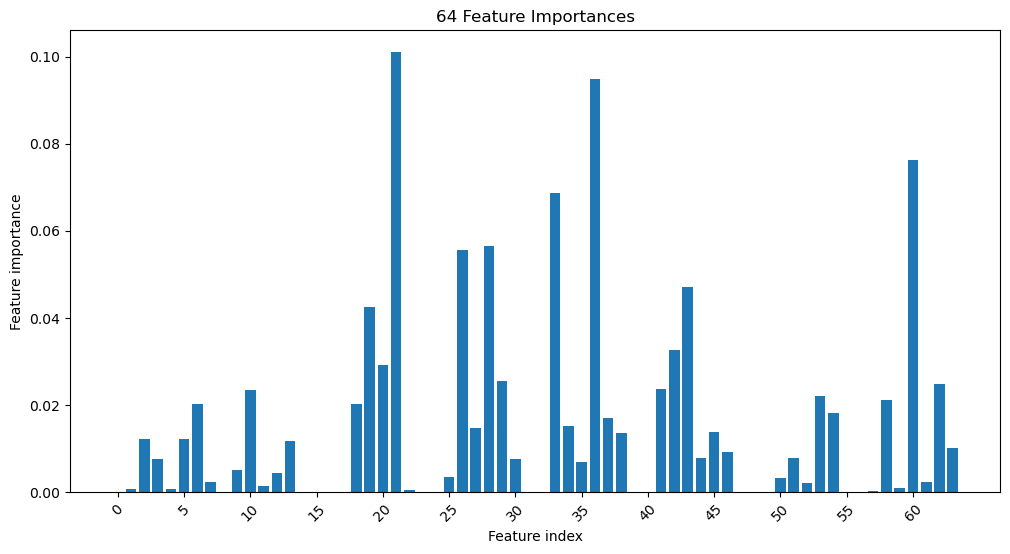

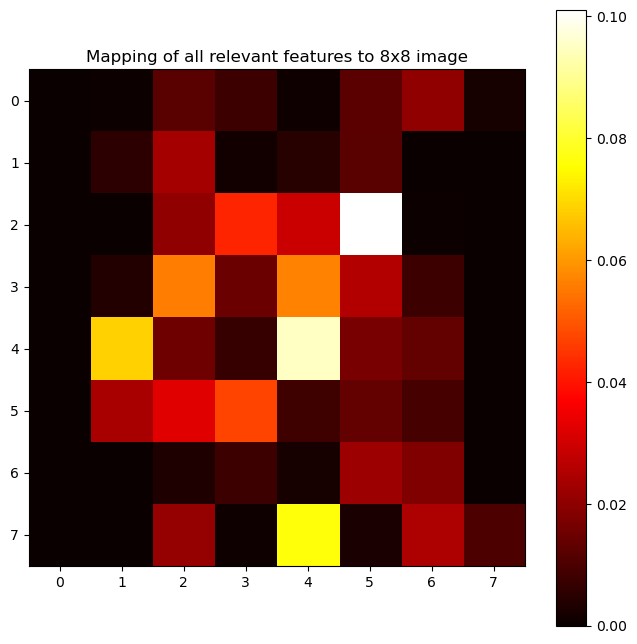

In [107]:
feature_importances = gbrt.feature_importances_


plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')


plt.xticks(range(0, len(feature_importances), 5), range(0, len(feature_importances), 5), rotation=45)

plt.xlabel('Feature index')
plt.ylabel('Feature importance')
plt.title('64 Feature Importances')
plt.show()

feature_importances = gbrt.feature_importances_


importance_grid = feature_importances.reshape(8, 8)

plt.figure(figsize=(8, 8))
plt.imshow(importance_grid, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Mapping of all relevant features to 8x8 image')
plt.show()